# 숨바꼭질 3
- https://www.acmicpc.net/problem/13549

- 걷기(1초): x-1 or x+1
- 순간이동(0초): 2*x

In [44]:
from collections import deque

n, k = map(int, input().split())
road = [0] * 100001

queue = deque([n])
road[n] = 1

while queue:
    now = queue.popleft()
    if now == k: # 동생을 찾으면
        print(road[k]-1)
        break
    for next_step in [2*now, now-1, now+1]:
        # 범위내에 방문하지 않은 경우
        if 0 <= next_step < 100001 and road[next_step] == 0:
            if next_step == 2 * now: # 순간 이동하는 경우
                road[next_step] = road[now]
                queue.appendleft(next_step)
            else: # 걸어서 이동하는 경우
                road[next_step] = road[now] + 1
                queue.append(next_step)

5 17
2


# 택배
- https://www.acmicpc.net/problem/1719

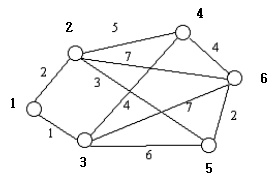

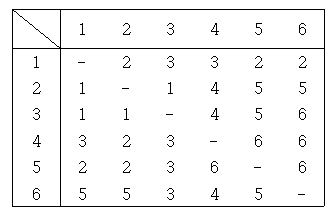

In [2]:
## 플로이드 와샬

INF = int(1e9) # 무한을 의미하는 값으로 10억 설정

# 집하장(노드)의 개수, 집하장간 경로(간선)의 개수
n, m = map(int, input().split())

# 2차원 리스트(그래프 표현)을 만들고, 모든 값을 무한으로 초기화
graph = [[INF] * (n+1) for _ in range(n+1)]

answer = [['-'] * (n+1) for _ in range(n+1)]

# 각 간선에 대한 정보를 입력받아, 그 값으로 초기화
for _ in range(m):
    # a에서 b로 가는 비용은 c라고 설정
    a, b, c = map(int, input().split())
    graph[a][b] = graph[b][a] = c
    # 집하장 정보
    answer[a][b] = str(b)
    answer[b][a] = str(a)

# 점화식에 따라 플로이드 워셜 알고리즘을 수행
for k in range(1, n+1):
    for a in range(1, n+1):
        for b in range(1, n+1):
            # 자기 자신으로 가는 경로는 제외
            if a == b:
                continue
            # k를 거쳐갈 때 최단거리가 되는 경우
            if graph[a][b] > graph[a][k] + graph[k][b]:
                graph[a][b] = graph[a][k] + graph[k][b]
                # k로 가기 위한 첫 번째 집하장 저장
                answer[a][b] = answer[a][k]

for i in answer[1:]:
    print(*i[1:])

6 10
1 2 2
1 3 1
2 4 5
2 5 3
2 6 7
3 4 4
3 5 6
3 6 7
4 6 4
5 6 2
- 2 3 3 2 2
1 - 1 4 5 5
1 1 - 4 5 6
3 2 3 - 6 6
2 2 3 6 - 6
5 5 3 4 5 -


In [14]:
## 다익스트라
import heapq
from collections import defaultdict
INF = int(1e9)

def dijkstra(start):
    parents = defaultdict() # 각 지점의 이전 지점을 저장하는 리스트
    for i in range(1, n+1):
        parents[i] = i
    # 최단 거리 테이블을 모두 무한으로 초기화
    distance = [INF] * (n+1)
    distance[start] = 0 # 시작 노드로 가기위한 최단 경로는 0으로 설정
    
    q = []
    heapq.heappush(q, (0, start))
    
    while q:
        dist, now = heapq.heappop(q)
        # 이미 처리된적이 있는 노드라면 무시
        if distance[now] < dist:
            continue
        # 현재 노드와 연결된 다른 인접한 노드들 확인
        for next_pos, next_cost in graph[now]:
            cost = dist + next_cost
            if cost < distance[next_pos]:
                heapq.heappush(q, (cost, next_pos))
                distance[next_pos] = cost
                parents[next_pos] = now
            
    # 각 지점에 가기 위해 첫번째로 방문하는 곳을 출력
    for i in range(1, n+1):
        if i == start: # 목적지가 자신이면 "-"출력
            print("-", end = " ")
        else: # 목적지가 다른 곳이면 parents에서 탐색
            curr = i
            while parents[curr] != start:
                curr = parents[curr]
            print(str(curr), end=" ")
    print()
                
# 집하장(노드)의 개수, 집하장간 경로(간선)의 개수
n, m = map(int, input().split())
# 각 노드에 연결되어 있는 노드에 대한 정보를 담는 리스트
graph = [[] for _ in range(n+1)]
# 모든 간선 정보
for _ in range(m):
    a, b, c = map(int, input().split())
    graph[a].append((b, c))
    graph[b].append((a, c))
    
for i in range(1, n+1):
    dijkstra(i)

6 10
1 2 2
1 3 1
2 4 5
2 5 3
2 6 7
3 4 4
3 5 6
3 6 7
4 6 4
5 6 2
- 2 3 3 2 2 
1 - 1 4 5 5 
1 1 - 4 5 6 
3 2 3 - 6 6 
2 2 3 6 - 6 
5 5 3 4 5 - 


# K번째 최단경로 찾기
- https://www.acmicpc.net/problem/1854

k번째 최단경로
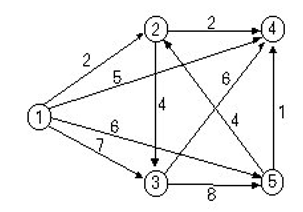

In [115]:
# 노드, 간선, K
n, m, k = map(int, input().split())
# 각 노드에 연결되어 있는 노드에 대한 정보를 담는 리스트
graph = [[] for _ in range(n+1)]

# 간선의 정보
for _ in range(m):
    a, b, c = map(int, input().split())
    graph[a].append((b, c))

INF = int(1e9)
# 최단 거리 테이블을 무한으로 초기화
distance = [[INF] * k for _ in range(n+1)]
def dijkstra(start):
    q = []
    heapq.heappush(q, (0, start)) # (거리, 노드번호)
    distance[start][0] = 0 # 시작 노드로 가기 위한 최단 경로는 0으로 설정
    while q:
        current_dist, current_node = heapq.heappop(q)
        if distance[current_node][k-1] < current_dist:
            continue
        for next_node, next_dist in graph[current_node]:
            cost = current_dist + next_dist
            if distance[next_node][k-1] > cost:
                distance[next_node][k-1] = cost
                distance[next_node].sort() # 정렬 후 다음 최단 경로 
                heapq.heappush(q, (cost, next_node))
    return distance

result = dijkstra(1)

for i in range(1, n+1):
    print(result[i][k - 1] if result[i][k - 1] != INF else -1)

5 10 2
1 2 2
1 3 7
1 4 5
1 5 6
2 4 2
2 3 4
3 4 6
3 5 8
5 2 4
5 4 1
-1
10
7
5
14
